In [1]:
import numpy as np
from tensorflow import keras
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout, Bidirectional, Conv1D, MaxPooling1D, Flatten, concatenate, Input
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras.utils import plot_model, model_to_dot
from os import listdir
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import pickle
import math


def build_rnn(X,lstm_layers,cells,output_size):
    model = Sequential()
    
    #model.add(Dense(units=cells,input_shape=(X.shape[1], X.shape[2])))
    for i in range(lstm_layers - 1):
        model.add(Bidirectional(LSTM(cells,activation='sigmoid',return_sequences=True)))
        model.add(Dropout(0.2))
        
    model.add(Bidirectional(LSTM(cells,activation='sigmoid')))
    model.add(Dropout(0.2))
    
    model.add(Dense(output_size, activation='softmax'))

    opt = Adam(learning_rate=3e-4)
    model.compile(loss = "mean_squared_error", metrics=['mean_squared_error'], optimizer = opt)
    return model

def build_cnn(X):
    model = Sequential()
    
    model.add(Conv1D(filters=16, kernel_size=21, activation='relu', input_shape=(4570, 1)))
    model.add(Conv1D(filters=32, kernel_size=11, activation='relu'))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Flatten())
    model.add(Dropout(0.1))
    model.add(Dense(50,activation='relu'))
    model.add(Dense(1,activation='relu'))
    opt = Adam(learning_rate=0.000001)
    model.compile(loss = "mean_squared_error", metrics=['mean_squared_error'], optimizer = opt)
    return model

In [2]:
x = []
masses = []
rows = []
for file in listdir('E:/spectra/'):
    row = int(file.split('sp')[0])
    with open('E:/spectra/'+file,'rb') as rfile:
        sp = pickle.load(rfile)
    if len(sp[1]) >= 4570:
        flux = sp[1]/np.std(sp[1])
        diff = (len(sp[1]) - 4570)/2
        flux = flux[int(np.floor(diff)):int(np.floor(diff)+4570)]
        flux = flux.reshape(flux.shape[0],1)
        x.append(flux)
        rows.append(row)
    else:
        continue
x = np.array(x)

magnesiums =  pd.read_csv('E:/catalogues/final_quasar_catalogue.csv', sep=',', usecols=['MBH_MgII'],header=0,squeeze=True)
carbons =  pd.read_csv('E:/catalogues/final_quasar_catalogue.csv', sep=',', usecols=['MBH_CIV'],header=0,squeeze=True)
masses = []
for i in rows:
    mag = magnesiums[i]
    car = carbons[i]
    if not math.isnan(mag) and not math.isnan(car):
        mass = 0.5*(mag+car)
    elif not math.isnan(mag):
        mass = mag
    elif not math.isnan(car):
        mass = car
    masses.append(mass)
y = np.array(masses)
y = (y - np.min(y))
y = y/np.max(np.abs(y))

<ipython-input-2-bcb19d6c97fd>:9: RuntimeWarning: invalid value encountered in true_divide
  flux = sp[1]/np.std(sp[1])


In [6]:
y

array([0.58244111, 0.52997859, 0.5729241 , ..., 0.56412087, 0.30835118,
       0.4120866 ])

In [79]:
n = 8294
#model = build_cnn(x[:n])

history = model.fit(x[:n], y[:n], epochs=1200, verbose=1,batch_size=1024, validation_split=0.2, shuffle=True)
#model.save(str('bot.h5'))

Epoch 1/1200
7/7 [==============================] - 1s 183ms/step - loss: 0.0094 - mean_squared_error: 0.0094 - val_loss: 0.0099 - val_mean_squared_error: 0.0099
Epoch 2/1200
7/7 [==============================] - 1s 182ms/step - loss: 0.0093 - mean_squared_error: 0.0093 - val_loss: 0.0100 - val_mean_squared_error: 0.0100
Epoch 3/1200
7/7 [==============================] - 1s 182ms/step - loss: 0.0092 - mean_squared_error: 0.0092 - val_loss: 0.0100 - val_mean_squared_error: 0.0100
Epoch 4/1200
7/7 [==============================] - 1s 182ms/step - loss: 0.0094 - mean_squared_error: 0.0094 - val_loss: 0.0100 - val_mean_squared_error: 0.0100
Epoch 5/1200
7/7 [==============================] - 1s 182ms/step - loss: 0.0091 - mean_squared_error: 0.0091 - val_loss: 0.0100 - val_mean_squared_error: 0.0100
Epoch 6/1200
7/7 [==============================] - 1s 182ms/step - loss: 0.0092 - mean_squared_error: 0.0092 - val_loss: 0.0100 - val_mean_squared_error: 0.0100
Epoch 7/1200
7/7 [==========

7/7 [==============================] - 1s 185ms/step - loss: 0.0079 - mean_squared_error: 0.0079 - val_loss: 0.0094 - val_mean_squared_error: 0.0094
Epoch 102/1200
7/7 [==============================] - 1s 181ms/step - loss: 0.0081 - mean_squared_error: 0.0081 - val_loss: 0.0094 - val_mean_squared_error: 0.0094
Epoch 103/1200
7/7 [==============================] - 1s 186ms/step - loss: 0.0081 - mean_squared_error: 0.0081 - val_loss: 0.0094 - val_mean_squared_error: 0.0094
Epoch 104/1200
7/7 [==============================] - 1s 184ms/step - loss: 0.0081 - mean_squared_error: 0.0081 - val_loss: 0.0094 - val_mean_squared_error: 0.0094
Epoch 105/1200
7/7 [==============================] - 1s 183ms/step - loss: 0.0079 - mean_squared_error: 0.0079 - val_loss: 0.0095 - val_mean_squared_error: 0.0095
Epoch 106/1200
7/7 [==============================] - 1s 187ms/step - loss: 0.0081 - mean_squared_error: 0.0081 - val_loss: 0.0093 - val_mean_squared_error: 0.0093
Epoch 107/1200
7/7 [===========

7/7 [==============================] - 1s 179ms/step - loss: 0.0076 - mean_squared_error: 0.0076 - val_loss: 0.0092 - val_mean_squared_error: 0.0092
Epoch 152/1200
7/7 [==============================] - 1s 179ms/step - loss: 0.0074 - mean_squared_error: 0.0074 - val_loss: 0.0092 - val_mean_squared_error: 0.0092
Epoch 153/1200
7/7 [==============================] - 1s 179ms/step - loss: 0.0074 - mean_squared_error: 0.0074 - val_loss: 0.0091 - val_mean_squared_error: 0.0091
Epoch 154/1200
7/7 [==============================] - 1s 182ms/step - loss: 0.0074 - mean_squared_error: 0.0074 - val_loss: 0.0092 - val_mean_squared_error: 0.0092
Epoch 155/1200
7/7 [==============================] - 1s 183ms/step - loss: 0.0077 - mean_squared_error: 0.0077 - val_loss: 0.0091 - val_mean_squared_error: 0.0091
Epoch 156/1200
7/7 [==============================] - 1s 181ms/step - loss: 0.0074 - mean_squared_error: 0.0074 - val_loss: 0.0091 - val_mean_squared_error: 0.0091
Epoch 157/1200
7/7 [===========

7/7 [==============================] - 1s 183ms/step - loss: 0.0069 - mean_squared_error: 0.0069 - val_loss: 0.0089 - val_mean_squared_error: 0.0089
Epoch 202/1200
7/7 [==============================] - 1s 180ms/step - loss: 0.0070 - mean_squared_error: 0.0070 - val_loss: 0.0089 - val_mean_squared_error: 0.0089
Epoch 203/1200
7/7 [==============================] - 1s 180ms/step - loss: 0.0069 - mean_squared_error: 0.0069 - val_loss: 0.0089 - val_mean_squared_error: 0.0089
Epoch 204/1200
7/7 [==============================] - 1s 180ms/step - loss: 0.0070 - mean_squared_error: 0.0070 - val_loss: 0.0089 - val_mean_squared_error: 0.0089
Epoch 205/1200
7/7 [==============================] - 1s 181ms/step - loss: 0.0072 - mean_squared_error: 0.0072 - val_loss: 0.0089 - val_mean_squared_error: 0.0089
Epoch 206/1200
7/7 [==============================] - 1s 180ms/step - loss: 0.0070 - mean_squared_error: 0.0070 - val_loss: 0.0089 - val_mean_squared_error: 0.0089
Epoch 207/1200
7/7 [===========

7/7 [==============================] - 1s 181ms/step - loss: 0.0064 - mean_squared_error: 0.0064 - val_loss: 0.0088 - val_mean_squared_error: 0.0088
Epoch 252/1200
7/7 [==============================] - 1s 182ms/step - loss: 0.0065 - mean_squared_error: 0.0065 - val_loss: 0.0086 - val_mean_squared_error: 0.0086
Epoch 253/1200
7/7 [==============================] - 1s 181ms/step - loss: 0.0065 - mean_squared_error: 0.0065 - val_loss: 0.0087 - val_mean_squared_error: 0.0087
Epoch 254/1200
7/7 [==============================] - 1s 181ms/step - loss: 0.0064 - mean_squared_error: 0.0064 - val_loss: 0.0087 - val_mean_squared_error: 0.0087
Epoch 255/1200
7/7 [==============================] - 1s 182ms/step - loss: 0.0066 - mean_squared_error: 0.0066 - val_loss: 0.0087 - val_mean_squared_error: 0.0087
Epoch 256/1200
7/7 [==============================] - 1s 182ms/step - loss: 0.0065 - mean_squared_error: 0.0065 - val_loss: 0.0087 - val_mean_squared_error: 0.0087
Epoch 257/1200
7/7 [===========

7/7 [==============================] - 1s 180ms/step - loss: 0.0061 - mean_squared_error: 0.0061 - val_loss: 0.0085 - val_mean_squared_error: 0.0085
Epoch 302/1200
7/7 [==============================] - 1s 181ms/step - loss: 0.0059 - mean_squared_error: 0.0059 - val_loss: 0.0085 - val_mean_squared_error: 0.0085
Epoch 303/1200
7/7 [==============================] - 1s 180ms/step - loss: 0.0061 - mean_squared_error: 0.0061 - val_loss: 0.0084 - val_mean_squared_error: 0.0084
Epoch 304/1200
7/7 [==============================] - 1s 182ms/step - loss: 0.0060 - mean_squared_error: 0.0060 - val_loss: 0.0084 - val_mean_squared_error: 0.0084
Epoch 305/1200
7/7 [==============================] - 1s 179ms/step - loss: 0.0058 - mean_squared_error: 0.0058 - val_loss: 0.0085 - val_mean_squared_error: 0.0085
Epoch 306/1200
7/7 [==============================] - 1s 180ms/step - loss: 0.0061 - mean_squared_error: 0.0061 - val_loss: 0.0084 - val_mean_squared_error: 0.0084
Epoch 307/1200
7/7 [===========

7/7 [==============================] - 1s 181ms/step - loss: 0.0056 - mean_squared_error: 0.0056 - val_loss: 0.0084 - val_mean_squared_error: 0.0084
Epoch 352/1200
7/7 [==============================] - 1s 181ms/step - loss: 0.0057 - mean_squared_error: 0.0057 - val_loss: 0.0082 - val_mean_squared_error: 0.0082
Epoch 353/1200
7/7 [==============================] - 1s 181ms/step - loss: 0.0056 - mean_squared_error: 0.0056 - val_loss: 0.0083 - val_mean_squared_error: 0.0083
Epoch 354/1200
7/7 [==============================] - 1s 180ms/step - loss: 0.0056 - mean_squared_error: 0.0056 - val_loss: 0.0083 - val_mean_squared_error: 0.0083
Epoch 355/1200
7/7 [==============================] - 1s 182ms/step - loss: 0.0055 - mean_squared_error: 0.0055 - val_loss: 0.0082 - val_mean_squared_error: 0.0082
Epoch 356/1200
7/7 [==============================] - 1s 181ms/step - loss: 0.0056 - mean_squared_error: 0.0056 - val_loss: 0.0083 - val_mean_squared_error: 0.0083
Epoch 357/1200
7/7 [===========

7/7 [==============================] - 1s 179ms/step - loss: 0.0051 - mean_squared_error: 0.0051 - val_loss: 0.0081 - val_mean_squared_error: 0.0081
Epoch 402/1200
7/7 [==============================] - 1s 179ms/step - loss: 0.0053 - mean_squared_error: 0.0053 - val_loss: 0.0081 - val_mean_squared_error: 0.0081
Epoch 403/1200
7/7 [==============================] - 1s 184ms/step - loss: 0.0052 - mean_squared_error: 0.0052 - val_loss: 0.0081 - val_mean_squared_error: 0.0081
Epoch 404/1200
7/7 [==============================] - 1s 181ms/step - loss: 0.0053 - mean_squared_error: 0.0053 - val_loss: 0.0081 - val_mean_squared_error: 0.0081
Epoch 405/1200
7/7 [==============================] - 1s 180ms/step - loss: 0.0052 - mean_squared_error: 0.0052 - val_loss: 0.0081 - val_mean_squared_error: 0.0081
Epoch 406/1200
7/7 [==============================] - 1s 182ms/step - loss: 0.0052 - mean_squared_error: 0.0052 - val_loss: 0.0081 - val_mean_squared_error: 0.0081
Epoch 407/1200
7/7 [===========

7/7 [==============================] - 1s 181ms/step - loss: 0.0048 - mean_squared_error: 0.0048 - val_loss: 0.0079 - val_mean_squared_error: 0.0079
Epoch 452/1200
7/7 [==============================] - 1s 179ms/step - loss: 0.0048 - mean_squared_error: 0.0048 - val_loss: 0.0079 - val_mean_squared_error: 0.0079
Epoch 453/1200
7/7 [==============================] - 1s 190ms/step - loss: 0.0049 - mean_squared_error: 0.0049 - val_loss: 0.0079 - val_mean_squared_error: 0.0079
Epoch 454/1200
7/7 [==============================] - 1s 181ms/step - loss: 0.0047 - mean_squared_error: 0.0047 - val_loss: 0.0079 - val_mean_squared_error: 0.0079
Epoch 455/1200
7/7 [==============================] - 1s 181ms/step - loss: 0.0047 - mean_squared_error: 0.0047 - val_loss: 0.0079 - val_mean_squared_error: 0.0079
Epoch 456/1200
7/7 [==============================] - 1s 190ms/step - loss: 0.0048 - mean_squared_error: 0.0048 - val_loss: 0.0079 - val_mean_squared_error: 0.0079
Epoch 457/1200
7/7 [===========

7/7 [==============================] - 1s 182ms/step - loss: 0.0045 - mean_squared_error: 0.0045 - val_loss: 0.0077 - val_mean_squared_error: 0.0077
Epoch 502/1200
7/7 [==============================] - 1s 180ms/step - loss: 0.0044 - mean_squared_error: 0.0044 - val_loss: 0.0077 - val_mean_squared_error: 0.0077
Epoch 503/1200
7/7 [==============================] - 1s 180ms/step - loss: 0.0045 - mean_squared_error: 0.0045 - val_loss: 0.0078 - val_mean_squared_error: 0.0078
Epoch 504/1200
7/7 [==============================] - 1s 181ms/step - loss: 0.0044 - mean_squared_error: 0.0044 - val_loss: 0.0077 - val_mean_squared_error: 0.0077
Epoch 505/1200
7/7 [==============================] - 1s 181ms/step - loss: 0.0046 - mean_squared_error: 0.0046 - val_loss: 0.0077 - val_mean_squared_error: 0.0077
Epoch 506/1200
7/7 [==============================] - 1s 182ms/step - loss: 0.0045 - mean_squared_error: 0.0045 - val_loss: 0.0077 - val_mean_squared_error: 0.0077
Epoch 507/1200
7/7 [===========

7/7 [==============================] - 1s 180ms/step - loss: 0.0043 - mean_squared_error: 0.0043 - val_loss: 0.0076 - val_mean_squared_error: 0.0076
Epoch 552/1200
7/7 [==============================] - 1s 179ms/step - loss: 0.0042 - mean_squared_error: 0.0042 - val_loss: 0.0076 - val_mean_squared_error: 0.0076
Epoch 553/1200
7/7 [==============================] - 1s 181ms/step - loss: 0.0043 - mean_squared_error: 0.0043 - val_loss: 0.0075 - val_mean_squared_error: 0.0075
Epoch 554/1200
7/7 [==============================] - 1s 180ms/step - loss: 0.0042 - mean_squared_error: 0.0042 - val_loss: 0.0076 - val_mean_squared_error: 0.0076
Epoch 555/1200
7/7 [==============================] - 1s 182ms/step - loss: 0.0042 - mean_squared_error: 0.0042 - val_loss: 0.0075 - val_mean_squared_error: 0.0075
Epoch 556/1200
7/7 [==============================] - 1s 183ms/step - loss: 0.0041 - mean_squared_error: 0.0041 - val_loss: 0.0075 - val_mean_squared_error: 0.0075
Epoch 557/1200
7/7 [===========

7/7 [==============================] - 1s 181ms/step - loss: 0.0039 - mean_squared_error: 0.0039 - val_loss: 0.0074 - val_mean_squared_error: 0.0074
Epoch 602/1200
7/7 [==============================] - 1s 179ms/step - loss: 0.0039 - mean_squared_error: 0.0039 - val_loss: 0.0074 - val_mean_squared_error: 0.0074
Epoch 603/1200
7/7 [==============================] - 1s 180ms/step - loss: 0.0040 - mean_squared_error: 0.0040 - val_loss: 0.0074 - val_mean_squared_error: 0.0074
Epoch 604/1200
7/7 [==============================] - 1s 179ms/step - loss: 0.0040 - mean_squared_error: 0.0040 - val_loss: 0.0074 - val_mean_squared_error: 0.0074
Epoch 605/1200
7/7 [==============================] - 1s 180ms/step - loss: 0.0039 - mean_squared_error: 0.0039 - val_loss: 0.0074 - val_mean_squared_error: 0.0074
Epoch 606/1200
7/7 [==============================] - 1s 180ms/step - loss: 0.0038 - mean_squared_error: 0.0038 - val_loss: 0.0074 - val_mean_squared_error: 0.0074
Epoch 607/1200
7/7 [===========

7/7 [==============================] - 1s 182ms/step - loss: 0.0037 - mean_squared_error: 0.0037 - val_loss: 0.0073 - val_mean_squared_error: 0.0073
Epoch 652/1200
7/7 [==============================] - 1s 181ms/step - loss: 0.0037 - mean_squared_error: 0.0037 - val_loss: 0.0073 - val_mean_squared_error: 0.0073
Epoch 653/1200
7/7 [==============================] - 1s 181ms/step - loss: 0.0037 - mean_squared_error: 0.0037 - val_loss: 0.0073 - val_mean_squared_error: 0.0073
Epoch 654/1200
7/7 [==============================] - 1s 181ms/step - loss: 0.0038 - mean_squared_error: 0.0038 - val_loss: 0.0073 - val_mean_squared_error: 0.0073
Epoch 655/1200
7/7 [==============================] - 1s 180ms/step - loss: 0.0037 - mean_squared_error: 0.0037 - val_loss: 0.0073 - val_mean_squared_error: 0.0073
Epoch 656/1200
7/7 [==============================] - 1s 182ms/step - loss: 0.0039 - mean_squared_error: 0.0039 - val_loss: 0.0073 - val_mean_squared_error: 0.0073
Epoch 657/1200
7/7 [===========

7/7 [==============================] - 1s 180ms/step - loss: 0.0035 - mean_squared_error: 0.0035 - val_loss: 0.0072 - val_mean_squared_error: 0.0072
Epoch 702/1200
7/7 [==============================] - 1s 180ms/step - loss: 0.0034 - mean_squared_error: 0.0034 - val_loss: 0.0072 - val_mean_squared_error: 0.0072
Epoch 703/1200
7/7 [==============================] - 1s 179ms/step - loss: 0.0034 - mean_squared_error: 0.0034 - val_loss: 0.0072 - val_mean_squared_error: 0.0072
Epoch 704/1200
7/7 [==============================] - 1s 179ms/step - loss: 0.0035 - mean_squared_error: 0.0035 - val_loss: 0.0072 - val_mean_squared_error: 0.0072
Epoch 705/1200
7/7 [==============================] - 1s 182ms/step - loss: 0.0035 - mean_squared_error: 0.0035 - val_loss: 0.0072 - val_mean_squared_error: 0.0072
Epoch 706/1200
7/7 [==============================] - 1s 180ms/step - loss: 0.0035 - mean_squared_error: 0.0035 - val_loss: 0.0072 - val_mean_squared_error: 0.0072
Epoch 707/1200
7/7 [===========

7/7 [==============================] - 1s 179ms/step - loss: 0.0032 - mean_squared_error: 0.0032 - val_loss: 0.0071 - val_mean_squared_error: 0.0071
Epoch 752/1200
7/7 [==============================] - 1s 180ms/step - loss: 0.0033 - mean_squared_error: 0.0033 - val_loss: 0.0071 - val_mean_squared_error: 0.0071
Epoch 753/1200
7/7 [==============================] - 1s 180ms/step - loss: 0.0032 - mean_squared_error: 0.0032 - val_loss: 0.0071 - val_mean_squared_error: 0.0071
Epoch 754/1200
7/7 [==============================] - 1s 179ms/step - loss: 0.0032 - mean_squared_error: 0.0032 - val_loss: 0.0071 - val_mean_squared_error: 0.0071
Epoch 755/1200
7/7 [==============================] - 1s 182ms/step - loss: 0.0033 - mean_squared_error: 0.0033 - val_loss: 0.0071 - val_mean_squared_error: 0.0071
Epoch 756/1200
7/7 [==============================] - 1s 182ms/step - loss: 0.0032 - mean_squared_error: 0.0032 - val_loss: 0.0071 - val_mean_squared_error: 0.0071
Epoch 757/1200
7/7 [===========

7/7 [==============================] - 1s 181ms/step - loss: 0.0031 - mean_squared_error: 0.0031 - val_loss: 0.0070 - val_mean_squared_error: 0.0070
Epoch 802/1200
7/7 [==============================] - 1s 181ms/step - loss: 0.0031 - mean_squared_error: 0.0031 - val_loss: 0.0070 - val_mean_squared_error: 0.0070
Epoch 803/1200
7/7 [==============================] - 1s 180ms/step - loss: 0.0030 - mean_squared_error: 0.0030 - val_loss: 0.0070 - val_mean_squared_error: 0.0070
Epoch 804/1200
7/7 [==============================] - 1s 180ms/step - loss: 0.0031 - mean_squared_error: 0.0031 - val_loss: 0.0070 - val_mean_squared_error: 0.0070
Epoch 805/1200
7/7 [==============================] - 1s 180ms/step - loss: 0.0031 - mean_squared_error: 0.0031 - val_loss: 0.0070 - val_mean_squared_error: 0.0070
Epoch 806/1200
7/7 [==============================] - 1s 180ms/step - loss: 0.0030 - mean_squared_error: 0.0030 - val_loss: 0.0070 - val_mean_squared_error: 0.0070
Epoch 807/1200
7/7 [===========

7/7 [==============================] - 1s 180ms/step - loss: 0.0029 - mean_squared_error: 0.0029 - val_loss: 0.0070 - val_mean_squared_error: 0.0070
Epoch 852/1200
7/7 [==============================] - 1s 182ms/step - loss: 0.0030 - mean_squared_error: 0.0030 - val_loss: 0.0069 - val_mean_squared_error: 0.0069
Epoch 853/1200
7/7 [==============================] - 1s 182ms/step - loss: 0.0030 - mean_squared_error: 0.0030 - val_loss: 0.0069 - val_mean_squared_error: 0.0069
Epoch 854/1200
7/7 [==============================] - 1s 179ms/step - loss: 0.0029 - mean_squared_error: 0.0029 - val_loss: 0.0070 - val_mean_squared_error: 0.0070
Epoch 855/1200
7/7 [==============================] - 1s 179ms/step - loss: 0.0029 - mean_squared_error: 0.0029 - val_loss: 0.0070 - val_mean_squared_error: 0.0070
Epoch 856/1200
7/7 [==============================] - 1s 180ms/step - loss: 0.0028 - mean_squared_error: 0.0028 - val_loss: 0.0070 - val_mean_squared_error: 0.0070
Epoch 857/1200
7/7 [===========

7/7 [==============================] - 1s 185ms/step - loss: 0.0028 - mean_squared_error: 0.0028 - val_loss: 0.0069 - val_mean_squared_error: 0.0069
Epoch 902/1200
7/7 [==============================] - 1s 187ms/step - loss: 0.0028 - mean_squared_error: 0.0028 - val_loss: 0.0069 - val_mean_squared_error: 0.0069
Epoch 903/1200
7/7 [==============================] - 1s 181ms/step - loss: 0.0029 - mean_squared_error: 0.0029 - val_loss: 0.0069 - val_mean_squared_error: 0.0069
Epoch 904/1200
7/7 [==============================] - 1s 180ms/step - loss: 0.0027 - mean_squared_error: 0.0027 - val_loss: 0.0069 - val_mean_squared_error: 0.0069
Epoch 905/1200
7/7 [==============================] - 1s 181ms/step - loss: 0.0028 - mean_squared_error: 0.0028 - val_loss: 0.0069 - val_mean_squared_error: 0.0069
Epoch 906/1200
7/7 [==============================] - 1s 182ms/step - loss: 0.0027 - mean_squared_error: 0.0027 - val_loss: 0.0069 - val_mean_squared_error: 0.0069
Epoch 907/1200
7/7 [===========

7/7 [==============================] - 1s 188ms/step - loss: 0.0027 - mean_squared_error: 0.0027 - val_loss: 0.0068 - val_mean_squared_error: 0.0068
Epoch 952/1200
7/7 [==============================] - 1s 186ms/step - loss: 0.0026 - mean_squared_error: 0.0026 - val_loss: 0.0068 - val_mean_squared_error: 0.0068
Epoch 953/1200
7/7 [==============================] - 1s 186ms/step - loss: 0.0027 - mean_squared_error: 0.0027 - val_loss: 0.0068 - val_mean_squared_error: 0.0068
Epoch 954/1200
7/7 [==============================] - 1s 186ms/step - loss: 0.0026 - mean_squared_error: 0.0026 - val_loss: 0.0068 - val_mean_squared_error: 0.0068
Epoch 955/1200
7/7 [==============================] - 1s 186ms/step - loss: 0.0026 - mean_squared_error: 0.0026 - val_loss: 0.0068 - val_mean_squared_error: 0.0068
Epoch 956/1200
7/7 [==============================] - 1s 185ms/step - loss: 0.0026 - mean_squared_error: 0.0026 - val_loss: 0.0068 - val_mean_squared_error: 0.0068
Epoch 957/1200
7/7 [===========

7/7 [==============================] - 1s 185ms/step - loss: 0.0026 - mean_squared_error: 0.0026 - val_loss: 0.0067 - val_mean_squared_error: 0.0067
Epoch 1002/1200
7/7 [==============================] - 1s 187ms/step - loss: 0.0025 - mean_squared_error: 0.0025 - val_loss: 0.0068 - val_mean_squared_error: 0.0068
Epoch 1003/1200
7/7 [==============================] - 1s 187ms/step - loss: 0.0025 - mean_squared_error: 0.0025 - val_loss: 0.0068 - val_mean_squared_error: 0.0068
Epoch 1004/1200
7/7 [==============================] - 1s 186ms/step - loss: 0.0025 - mean_squared_error: 0.0025 - val_loss: 0.0068 - val_mean_squared_error: 0.0068
Epoch 1005/1200
7/7 [==============================] - 1s 186ms/step - loss: 0.0025 - mean_squared_error: 0.0025 - val_loss: 0.0068 - val_mean_squared_error: 0.0068
Epoch 1006/1200
7/7 [==============================] - 1s 186ms/step - loss: 0.0025 - mean_squared_error: 0.0025 - val_loss: 0.0068 - val_mean_squared_error: 0.0068
Epoch 1007/1200
7/7 [=====

Epoch 1051/1200
7/7 [==============================] - 1s 181ms/step - loss: 0.0024 - mean_squared_error: 0.0024 - val_loss: 0.0067 - val_mean_squared_error: 0.0067
Epoch 1052/1200
7/7 [==============================] - 1s 181ms/step - loss: 0.0024 - mean_squared_error: 0.0024 - val_loss: 0.0067 - val_mean_squared_error: 0.0067
Epoch 1053/1200
7/7 [==============================] - 1s 180ms/step - loss: 0.0024 - mean_squared_error: 0.0024 - val_loss: 0.0067 - val_mean_squared_error: 0.0067
Epoch 1054/1200
7/7 [==============================] - 1s 181ms/step - loss: 0.0024 - mean_squared_error: 0.0024 - val_loss: 0.0067 - val_mean_squared_error: 0.0067
Epoch 1055/1200
7/7 [==============================] - 1s 181ms/step - loss: 0.0024 - mean_squared_error: 0.0024 - val_loss: 0.0067 - val_mean_squared_error: 0.0067
Epoch 1056/1200
7/7 [==============================] - 1s 180ms/step - loss: 0.0023 - mean_squared_error: 0.0023 - val_loss: 0.0067 - val_mean_squared_error: 0.0067
Epoch 1057

Epoch 1101/1200
7/7 [==============================] - 1s 182ms/step - loss: 0.0023 - mean_squared_error: 0.0023 - val_loss: 0.0067 - val_mean_squared_error: 0.0067
Epoch 1102/1200
7/7 [==============================] - 1s 181ms/step - loss: 0.0022 - mean_squared_error: 0.0022 - val_loss: 0.0067 - val_mean_squared_error: 0.0067
Epoch 1103/1200
7/7 [==============================] - 1s 182ms/step - loss: 0.0023 - mean_squared_error: 0.0023 - val_loss: 0.0067 - val_mean_squared_error: 0.0067
Epoch 1104/1200
7/7 [==============================] - 1s 183ms/step - loss: 0.0023 - mean_squared_error: 0.0023 - val_loss: 0.0067 - val_mean_squared_error: 0.0067
Epoch 1105/1200
7/7 [==============================] - 1s 182ms/step - loss: 0.0023 - mean_squared_error: 0.0023 - val_loss: 0.0067 - val_mean_squared_error: 0.0067
Epoch 1106/1200
7/7 [==============================] - 1s 181ms/step - loss: 0.0023 - mean_squared_error: 0.0023 - val_loss: 0.0067 - val_mean_squared_error: 0.0067
Epoch 1107

Epoch 1151/1200
7/7 [==============================] - 1s 181ms/step - loss: 0.0022 - mean_squared_error: 0.0022 - val_loss: 0.0066 - val_mean_squared_error: 0.0066
Epoch 1152/1200
7/7 [==============================] - 1s 181ms/step - loss: 0.0022 - mean_squared_error: 0.0022 - val_loss: 0.0067 - val_mean_squared_error: 0.0067
Epoch 1153/1200
7/7 [==============================] - 1s 183ms/step - loss: 0.0022 - mean_squared_error: 0.0022 - val_loss: 0.0067 - val_mean_squared_error: 0.0067
Epoch 1154/1200
7/7 [==============================] - 1s 181ms/step - loss: 0.0022 - mean_squared_error: 0.0022 - val_loss: 0.0067 - val_mean_squared_error: 0.0067
Epoch 1155/1200
7/7 [==============================] - 1s 180ms/step - loss: 0.0022 - mean_squared_error: 0.0022 - val_loss: 0.0067 - val_mean_squared_error: 0.0067
Epoch 1156/1200
7/7 [==============================] - 1s 181ms/step - loss: 0.0021 - mean_squared_error: 0.0021 - val_loss: 0.0067 - val_mean_squared_error: 0.0067
Epoch 1157

Text(0, 0.5, 'y_pred')

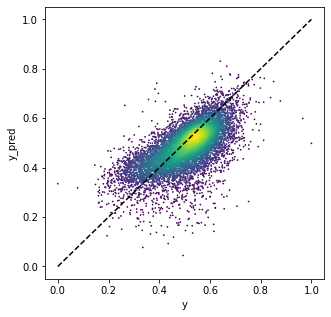

In [78]:
from scipy.stats import gaussian_kde

y_pred = model.predict(x)
xy = np.vstack([y,[i[0] for i in y_pred]])
z = gaussian_kde(xy)(xy)

plt.figure(figsize=(5,5))
plt.scatter(y,y_pred,c=z,s=0.5)
plt.plot([0,1],[0,1],c='black',linestyle='dashed')
plt.xlabel('y')
plt.ylabel('y_pred')

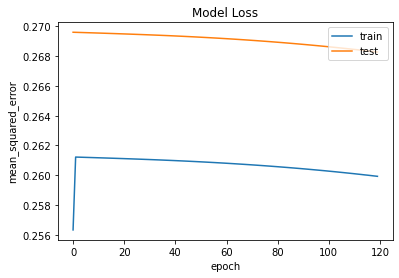

In [22]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('mean_squared_error')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

In [168]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_16 (Conv1D)           (None, 4569, 64)          192       
_________________________________________________________________
conv1d_17 (Conv1D)           (None, 4568, 64)          8256      
_________________________________________________________________
max_pooling1d_8 (MaxPooling1 (None, 2284, 64)          0         
_________________________________________________________________
flatten_8 (Flatten)          (None, 146176)            0         
_________________________________________________________________
dropout_8 (Dropout)          (None, 146176)            0         
_________________________________________________________________
dense_16 (Dense)             (None, 50)                7308850   
_________________________________________________________________
dense_17 (Dense)             (None, 1)                

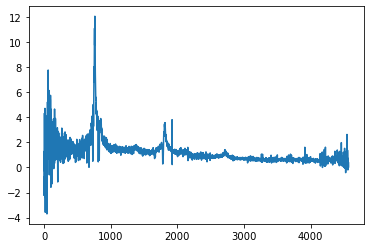

In [75]:
plt.plot(x[8900])

In [2]:
import tensorflow as tf
tf.test.is_gpu_available(cuda_only=False, min_cuda_compute_capability=None)

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


True

In [15]:
from astroquery.sdss import SDSS
print(SDSS.AVAILABLE_TEMPLATES)

{'star_O': 0, 'star_OB': 1, 'star_B': 2, 'star_A': [3, 4], 'star_FA': 5, 'star_F': [6, 7], 'star_G': [8, 9], 'star_K': 10, 'star_M1': 11, 'star_M3': 12, 'star_M5': 13, 'star_M8': 14, 'star_L1': 15, 'star_wd': [16, 20, 21], 'star_carbon': [17, 18, 19], 'star_Ksubdwarf': 22, 'galaxy_early': 23, 'galaxy': [24, 25, 26], 'galaxy_late': 27, 'galaxy_lrg': 28, 'qso': 29, 'qso_bal': [30, 31], 'qso_bright': 32}


In [16]:
template = SDSS.get_spectral_template('qso')

In [15]:
catalogue = pd.read_csv('E:/catalogues/final_quasar_catalogue.csv', sep=',', usecols=['GMAG'],header=0,squeeze=True)
place = np.where(catalogue < 18)
print(len(place[0]))
print(place,catalogue[place[0]])

648
(array([   51,   477,   580,   632,   820,   829,   898,   959,  1070,
        1082,  1164,  1175,  1475,  1847,  1940,  2068,  2131,  2182,
        2326,  2445,  2453,  2476,  2502,  2534,  2551,  2603,  2684,
        2742,  2784,  2788,  2829,  2906,  2980,  3020,  3072,  3088,
        3165,  3189,  3419,  3452,  3461,  3517,  3587,  3590,  3595,
        3621,  3649,  3653,  3655,  3667,  3715,  3718,  3729,  3732,
        3738,  3741,  3795,  3816,  3819,  3821,  3857,  3864,  3885,
        3916,  3936,  3940,  3943,  3952,  3983,  4004,  4050,  4110,
        4122,  4126,  4147,  4274,  4285,  4368,  4397,  4399,  4415,
        4435,  4457,  4467,  4473,  4475,  4491,  4513,  4519,  4536,
        4537,  4596,  4608,  4875,  4887,  4895,  4930,  4979,  4986,
        5005,  5007,  5042,  5052,  5066,  5099,  5110,  5172,  5215,
        5241,  5243,  5256,  5262,  5372,  5423,  5497,  5528,  5588,
        5608,  5642,  5655,  5723,  5784,  5794,  5830,  5856,  5919,
        5945,  

In [9]:
pd.read_csv('E:/catalogues/final_quasar_catalogue.csv', sep=',', usecols=['GMAG'],header=0,squeeze=True)[1940]

16.681345